In [1]:
import os

os.chdir("../..") # need to set path to repo root

In [2]:
from src.image import ImageDatabase, ImageStorage

storage = ImageStorage("front_scans", db=ImageDatabase.SHARED)
storage.size()

187

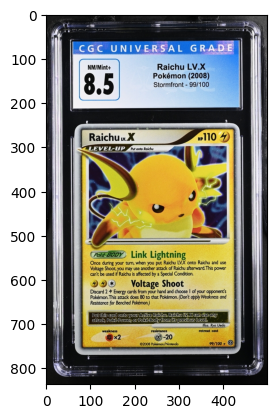

In [3]:
from src.image import crop_image, display_image

image_keys = storage.get_all_keys()
img = storage.get_image(image_keys[0])
display_image(img)

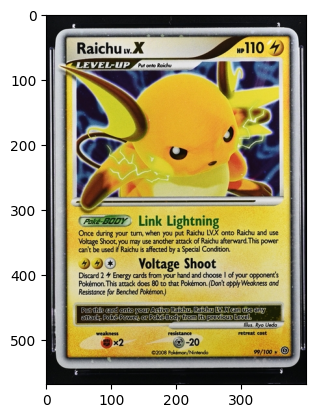

In [4]:
cgc_crop_percents = { "top": .27, "right": 0.1, "bottom": 0.05, "left": 0.1 }

cropped_card = crop_image(img, **cgc_crop_percents)
display_image(cropped_card)

In [5]:
# generic format: { file_name: str, id: int, height: int, width: int, x0: int, x1: int, y0: int, y1: int }
labels = []

for i, key in enumerate(image_keys):
    img = storage.get_image(key)
    width, height = img.size
    labels.append({
        "file_name": key,
        "id": i,
        "height": height,
        "width": width,
        "annotation_id": 0, # if multiple, this increments
        "y0": int(height * cgc_crop_percents["top"]),
        "y1": int(height * (1 - cgc_crop_percents["bottom"])),
        "x0": int(width * cgc_crop_percents["left"]),
        "x1": int(width * (1 - cgc_crop_percents["right"]))
    })
len(labels), labels[-1]

(187,
 {'file_name': '4126147001_1',
  'id': 186,
  'height': 785,
  'width': 500,
  'annotation_id': 0,
  'y0': 211,
  'y1': 745,
  'x0': 50,
  'x1': 450})

In [6]:
from src.shared import jsonify, json_dump_file

with open("./db/shared/front_scans.json", "w") as f:
    json_dump_file(labels, f)